### Accessing JSON data through an API
#### Yelp Fusion API
1. Obtain a Yelp Fusion Developer Account here: https://fusion.yelp.com/ Use your student email and access your email to verify your account.
2. Create a Yelp Fusion App.  Login to your Yelp developer account, and select Manage App under General.  Enter an App Name (such as Review Sentiments), your email and a description. 
3. Save your client id and api key in a separate (private) .py file.  This script assumes that this information is saved in yelpkeys.py with the variables client_id and api_key respectively.
4. Import your id and key into your notebook by importing the file containing this private information.


In [1]:
import requests
import yelpkeys  # file where client_id and api_key is defined with user's private app information
from textblob import TextBlob

In [3]:
APIKEY = yelpkeys.api_key
headers = {'Authorization': 'Bearer %s' % yelpkeys.api_key,}

In [5]:
"""
Yelp Fusion API code sample.
This program demonstrates the capability of the Yelp Fusion API
by using the Search API to query for businesses by a search term and location,
and the Business API to query additional information about the top result
from the search query.
Please refer to https://docs.developer.yelp.com/docs/get-started for the API
documentation.
This program requires the Python requests library, which you can install via:
`pip install -r requirements.txt`.
Sample usage of the program:
`python sample.py --term="bars" --location="San Francisco, CA"`
"""
from __future__ import print_function

import argparse
import json
import pprint
import requests
import sys
import urllib


# This client code can run on Python 2.x or 3.x.  Your imports can be
# simpler if you only need one of those.
try:
    # For Python 3.0 and later
    from urllib.error import HTTPError
    from urllib.parse import quote
    from urllib.parse import urlencode
except ImportError:
    # Fall back to Python 2's urllib2 and urllib
    from urllib2 import HTTPError
    from urllib import quote
    from urllib import urlencode


# Yelp Fusion no longer uses OAuth as of December 7, 2017.
# You no longer need to provide Client ID to fetch Data
# It now uses private keys to authenticate requests (API Key)
# You can find it on
# https://www.yelp.com/developers/v3/manage_app
API_KEY= yelpkeys.api_key


# API constants, you shouldn't have to change these.
API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'
BUSINESS_PATH = '/v3/businesses/'  # Business ID will come after slash.


# Defaults for our simple example.
DEFAULT_TERM = 'dinner'
DEFAULT_LOCATION = 'San Francisco, CA'
SEARCH_LIMIT = 20


def request(host, path, api_key, url_params=None):
    """Given your API_KEY, send a GET request to the API.
    Args:
        host (str): The domain host of the API.
        path (str): The path of the API after the domain.
        API_KEY (str): Your API Key.
        url_params (dict): An optional set of query parameters in the request.
    Returns:
        dict: The JSON response from the request.
    Raises:
        HTTPError: An error occurs from the HTTP request.
    """
    url_params = url_params or {}
    url = '{0}{1}'.format(host, quote(path.encode('utf8')))
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }

    print(u'Querying {0} ...'.format(url))

    response = requests.request('GET', url, headers=headers, params=url_params)

    return response.json()


def search(api_key, term, location):
    """Query the Search API by a search term and location.
    Args:
        term (str): The search term passed to the API.
        location (str): The search location passed to the API.
    Returns:
        dict: The JSON response from the request.
    """

    url_params = {
        'term': term.replace(' ', '+'),
        'location': location.replace(' ', '+'),
        'limit': SEARCH_LIMIT
    }
    return request(API_HOST, SEARCH_PATH, api_key, url_params=url_params)


def get_business(api_key, business_id):
    """Query the Business API by a business ID.
    Args:
        business_id (str): The ID of the business to query.
    Returns:
        dict: The JSON response from the request.
    """
    business_path = BUSINESS_PATH + business_id

    return request(API_HOST, business_path, api_key)


def query_api(term, location):
    """Queries the API by the input values from the user.
    Args:
        term (str): The search term to query.
        location (str): The location of the business to query.
    """
    response = search(API_KEY, term, location)

    businesses = response.get('businesses')

    if not businesses:
        print(u'No businesses for {0} in {1} found.'.format(term, location))
        return

    business_id = businesses[0]['id']

    print(u'{0} businesses found, querying business info ' \
        'for the top result "{1}" ...'.format(
            len(businesses), business_id))
    response = get_business(API_KEY, business_id)

    print(u'Result for business "{0}" found:'.format(business_id))
    pprint.pprint(response, indent=2)

In [7]:
response = search(API_KEY,DEFAULT_TERM, 'Randolph, NJ')

Querying https://api.yelp.com/v3/businesses/search ...


In [9]:
response

{'businesses': [{'id': 'vxutVNBji5IbTY_CWBoe8A',
   'alias': 'one11-bar-and-kitchen-dover',
   'name': 'ONE11 Bar & Kitchen',
   'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/r7hunfYyDGJ5QkCZY3bFgg/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/one11-bar-and-kitchen-dover?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ',
   'review_count': 72,
   'categories': [{'alias': 'cocktailbars', 'title': 'Cocktail Bars'},
    {'alias': 'burgers', 'title': 'Burgers'},
    {'alias': 'latin', 'title': 'Latin American'}],
   'rating': 4.6,
   'coordinates': {'latitude': 40.88501921311059, 'longitude': -74.552576},
   'transactions': ['delivery', 'pickup'],
   'price': '$$',
   'location': {'address1': '111 E Blackwell St',
    'address2': None,
    'address3': '',
    'city': 'Dover',
    'zip_code': '07801',
    'country': 'US',
    'state': 'NJ',
    'display_address': ['111 E Blackwell

In [11]:
for business in response['businesses']:
    print(response)
    print('Business Name: ' + business['name'])
    print('Rating: ' + str(business['rating']))
    print('Review Count: ' + str(business['review_count']))
    print('Reviews: ')
    BUS_REVIEW='/v3/businesses/{}/reviews'.format(business['id'])
    #print('https://api.yelp.com/v3/businesses/{}/reviews?limit=20&sort_by=yelp_sort'.format(business['id']))
    reviews = request(API_HOST,BUS_REVIEW, API_KEY)
    for review in reviews['reviews']:
        print(' - ' + review['text'])
        # Perform sentiment analysis on the review using TextBlob
        blob = TextBlob(review['text'])
        sentiment = blob.sentiment.polarity
        if sentiment > 0:
            print('    Sentiment: Positive')
        elif sentiment < 0:
            print('    Sentiment: Negative')
        else:
            print('    Sentiment: Neutral')
        print('\n================\n\n\n')

{'businesses': [{'id': 'vxutVNBji5IbTY_CWBoe8A', 'alias': 'one11-bar-and-kitchen-dover', 'name': 'ONE11 Bar & Kitchen', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/r7hunfYyDGJ5QkCZY3bFgg/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/one11-bar-and-kitchen-dover?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ', 'review_count': 72, 'categories': [{'alias': 'cocktailbars', 'title': 'Cocktail Bars'}, {'alias': 'burgers', 'title': 'Burgers'}, {'alias': 'latin', 'title': 'Latin American'}], 'rating': 4.6, 'coordinates': {'latitude': 40.88501921311059, 'longitude': -74.552576}, 'transactions': ['delivery', 'pickup'], 'price': '$$', 'location': {'address1': '111 E Blackwell St', 'address2': None, 'address3': '', 'city': 'Dover', 'zip_code': '07801', 'country': 'US', 'state': 'NJ', 'display_address': ['111 E Blackwell St', 'Dover, NJ 07801']}, 'phone': '+19733437756', 'display_phone': '(9

 - Amazing food with the best customer service. Food took a little longer than expected but it was busy on a Friday evening but the guy gave me a free entre as...
    Sentiment: Positive




 - Food is mouth watering!! We always do order pickup and they are always on time! Definitely recommend if you want fresh and delish food
    Sentiment: Positive




 - This has become our go to spot in the last few months. Great local family run establishment with delicious food. We have gotten quite a few different...
    Sentiment: Positive




{'businesses': [{'id': 'vxutVNBji5IbTY_CWBoe8A', 'alias': 'one11-bar-and-kitchen-dover', 'name': 'ONE11 Bar & Kitchen', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/r7hunfYyDGJ5QkCZY3bFgg/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/one11-bar-and-kitchen-dover?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ', 'review_count': 39, 'categories': [{'al

 - Only ever had just a takeout plain pizza from this place a handful of times and they never disappointed! Pizza is always good, and staff always provided...
    Sentiment: Positive




 - We order often from Forte. And it becomes increasingly disappointing. My husband always gets a hamburger. And we always request. Well done. Today's...
    Sentiment: Negative




 - Got delivery. Great timing. Was a bit disappointed. I got pasta that was so salty it was like the chef accidentally spilled salt into my sauce. I love salt....
    Sentiment: Positive




{'businesses': [{'id': 'vxutVNBji5IbTY_CWBoe8A', 'alias': 'one11-bar-and-kitchen-dover', 'name': 'ONE11 Bar & Kitchen', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/r7hunfYyDGJ5QkCZY3bFgg/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/one11-bar-and-kitchen-dover?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ', 'review_count': 39, 

### Simple code for creating a donut chart (courtesy of chatGPT)

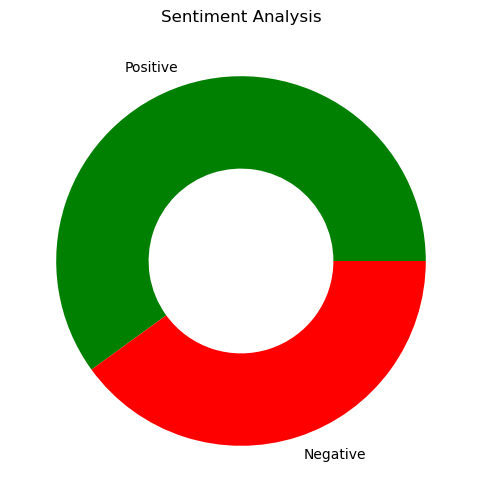

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define data
pos = 60
neg = 40
labels = ['Positive', 'Negative']
values = [pos, neg]

# Create donut chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(values, labels=labels, wedgeprops=dict(width=0.5), colors=['green', 'red'])
ax.set_title('Sentiment Analysis')

plt.show()